<a href="https://colab.research.google.com/github/syilmazs/DeepLearning/blob/main/Assignment_2_(CNN_Image_Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Image Classification with CNN


Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

------------

## Task

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## The Data

**Download the fashion mnist dataset using Keras.**

In [1]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [2]:
import os
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from sklearn.model_selection import train_test_split
from keras import optimizers
from keras.preprocessing import image
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [75]:
labels=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

## Visualizing the Data

**Using matplotlib show an any image from the data set.**

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

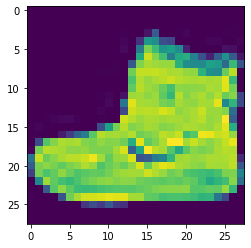

In [6]:
plt.imshow(X_train[0]);

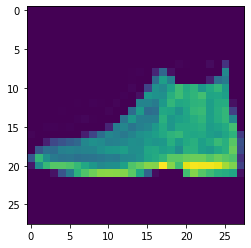

In [7]:
plt.imshow(X_test[0]);

## Preprocessing the Data

**Normalize the X train and X test using max value of the image arrays.**

In [8]:
# Before normalization
print('Train: min=%.2f, max=%.2f' % (X_train.min(), X_train.max()))
print('Test: min=%.2f, max=%.2f' % (X_test.min(), X_test.max()))

Train: min=0.00, max=255.00
Test: min=0.00, max=255.00


In [9]:
X_train = X_train/255
X_test = X_test/255

In [10]:
# After normalization
print('Train: min=%.2f, max=%.2f' % (X_train.min(), X_train.max()))
print('Test: min=%.2f, max=%.2f' % (X_test.min(), X_test.max()))

Train: min=0.00, max=1.00
Test: min=0.00, max=1.00


In [11]:
x = []
y = []
for i in range(X_train.shape[0]):
    
    d1,d2, = X_train[i].shape
    x.append(d1)
    y.append(d2)

In [12]:
max(x), max(y)

(28, 28)

In [13]:
min(y), min(x)

(28, 28)

All of the images are in 28x28 size.

**Reshape the X into 4 dimension**

In [15]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [16]:
width, height, channels = X_train.shape[1], X_train.shape[2], 1
X_train = X_train.reshape((X_train.shape[0], width, height, channels))
X_test = X_test.reshape((X_test.shape[0], width, height, channels))

In [17]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**Convert the y_train and y_test values to be one-hot encoded for categorical analysis.**

In [18]:
from tensorflow.keras.utils import to_categorical

In [19]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [20]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [21]:
y_train_cat

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Building the Model

**Create the model**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [45]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3),input_shape= (28,28,1), padding='same', activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))

model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 27, 27, 28)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 20412)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               2612864   
                                                                 
 activation_6 (Activation)   (None, 128)               0         
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                      

###  Model Training 

**Train the model with arbitrary amount of epochs.**

In [48]:
model.fit(X_train, y= y_train_cat, epochs=20, batch_size = 128,
                    validation_data=(X_test,y_test_cat), verbose=1)

Epoch 1/20
469/469 [==============================] - 5s 11ms/step - loss: 0.3373 - accuracy: 0.8804 - val_loss: 0.2895 - val_accuracy: 0.8955
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.2912 - accuracy: 0.8969 - val_loss: 0.2747 - val_accuracy: 0.9009
Epoch 3/20
469/469 [==============================] - 6s 13ms/step - loss: 0.2631 - accuracy: 0.9052 - val_loss: 0.3095 - val_accuracy: 0.8877
Epoch 4/20
469/469 [==============================] - 5s 10ms/step - loss: 0.2460 - accuracy: 0.9135 - val_loss: 0.2741 - val_accuracy: 0.9032
Epoch 5/20
469/469 [==============================] - 5s 10ms/step - loss: 0.2377 - accuracy: 0.9161 - val_loss: 0.2581 - val_accuracy: 0.9107
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 0.2328 - accuracy: 0.9182 - val_loss: 0.2632 - val_accuracy: 0.9116
Epoch 7/20
469/469 [==============================] - 5s 11ms/step - loss: 0.2237 - accuracy: 0.9204 - val_loss: 0.2850 - val_accuracy: 0.9114

**Plot values of metrics you used in your model.**

In [49]:
summary = pd.DataFrame(model.history.history)
summary

,loss,accuracy,val_loss,val_accuracy
0,0.337297,0.880417,0.289453,0.8955
1,0.291227,0.896900,0.274699,0.9009
2,0.263070,0.905217,0.309512,0.8877
3,0.246044,0.913467,0.274148,0.9032
4,0.237747,0.916083,0.258113,0.9107
5,0.232791,0.918200,0.263170,0.9116
6,0.223673,0.920367,0.285019,0.9114
7,0.221584,0.922467,0.261417,0.9092
8,0.217131,0.924000,0.291135,0.9069
9,0.211044,0.925783,0.266224,0.9110


<Figure size 864x576 with 0 Axes>

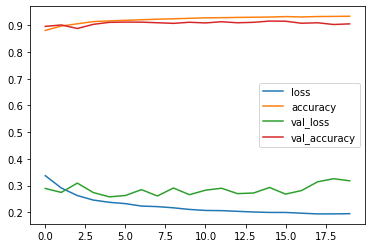

In [50]:
plt.figure(figsize=(12,8))
summary.plot();

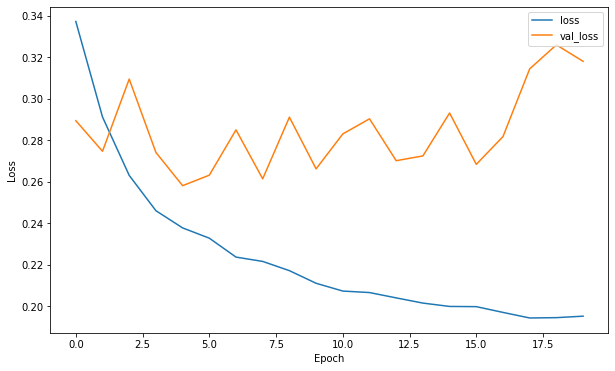

In [51]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

**Train the model using earlystop.**

In [52]:
from tensorflow.keras.callbacks import EarlyStopping

In [53]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [54]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3),input_shape= (28,28,1), padding='same', activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))

model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [55]:
model.fit(X_train, y= y_train_cat, epochs=20, batch_size = 128,
                    validation_data=(X_test,y_test_cat),
                    callbacks=[early_stop], verbose=1)

Epoch 1/20
469/469 [==============================] - 6s 11ms/step - loss: 0.5080 - accuracy: 0.8278 - val_loss: 0.3451 - val_accuracy: 0.8740
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.3296 - accuracy: 0.8842 - val_loss: 0.3271 - val_accuracy: 0.8815
Epoch 3/20
469/469 [==============================] - 5s 10ms/step - loss: 0.2890 - accuracy: 0.8998 - val_loss: 0.2677 - val_accuracy: 0.9019
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.2643 - accuracy: 0.9068 - val_loss: 0.2692 - val_accuracy: 0.9040
Epoch 5/20
469/469 [==============================] - 6s 12ms/step - loss: 0.2481 - accuracy: 0.9120 - val_loss: 0.2661 - val_accuracy: 0.9072
Epoch 6/20
469/469 [==============================] - 7s 14ms/step - loss: 0.2376 - accuracy: 0.9169 - val_loss: 0.2654 - val_accuracy: 0.9084
Epoch 7/20
469/469 [==============================] - 5s 10ms/step - loss: 0.2281 - accuracy: 0.9209 - val_loss: 0.2530 - val_accuracy: 0.9127

**Plot values of metrics you used in your model.**

In [56]:
summary_estop = pd.DataFrame(model.history.history)
summary_estop

,loss,accuracy,val_loss,val_accuracy
0,0.507992,0.827800,0.345068,0.8740
1,0.329561,0.884250,0.327119,0.8815
2,0.289014,0.899817,0.267736,0.9019
3,0.264334,0.906783,0.269212,0.9040
4,0.248073,0.912033,0.266073,0.9072
5,0.237599,0.916867,0.265374,0.9084
6,0.228053,0.920950,0.253007,0.9127
7,0.222008,0.922800,0.268804,0.9090
8,0.217867,0.924900,0.253581,0.9133
9,0.209211,0.926617,0.260147,0.9116


<Figure size 864x576 with 0 Axes>

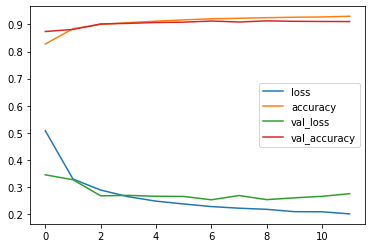

In [57]:
plt.figure(figsize=(12,8))
summary_estop.plot();

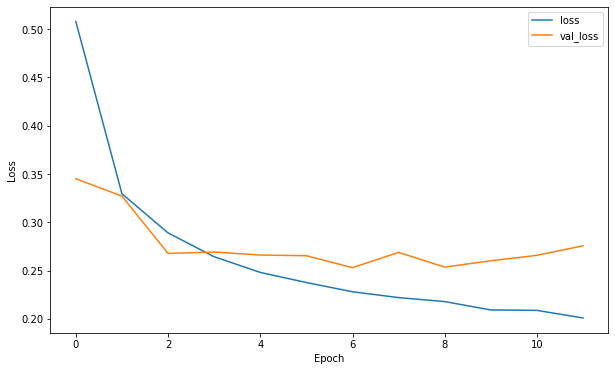

In [58]:
plt.figure(figsize=(10,6))
plt.plot(summary_estop.loss, label="loss")
plt.plot(summary_estop.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

Without early_stop model tends to overfit. After using early_stop model have lower val_loss score and a slightly higher accuracy score.

### Model Evaluation

**Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set.**

In [59]:
model.metrics_names

['loss', 'accuracy']

In [60]:
model.evaluate(X_test, y_test_cat)

313/313 [==============================] - 1s 4ms/step - loss: 0.2756 - accuracy: 0.9107


[0.2756408751010895, 0.9107000231742859]

In [61]:
from sklearn.metrics import classification_report

In [63]:
predictions = model.predict(X_test)
predictions

array([[6.5068828e-10, 4.8371505e-16, 3.0947482e-09, ..., 1.5703134e-05,
        4.4700412e-09, 9.9997520e-01],
       [3.3118209e-07, 1.4044599e-22, 9.9999964e-01, ..., 2.3309128e-22,
        2.7594658e-15, 1.8438941e-25],
       [2.1226509e-09, 1.0000000e+00, 1.0895735e-12, ..., 1.0049949e-14,
        7.8260098e-12, 4.1956456e-16],
       ...,
       [4.2458139e-09, 6.3617703e-24, 3.3882179e-12, ..., 8.4499657e-16,
        1.0000000e+00, 1.7153177e-19],
       [4.3692897e-10, 1.0000000e+00, 2.5042059e-13, ..., 1.9784438e-14,
        1.0923125e-11, 1.0069444e-14],
       [3.4150872e-03, 4.0251536e-05, 5.1458227e-03, ..., 4.1054249e-01,
        2.7890394e-02, 7.4878976e-02]], dtype=float32)

In [64]:
preds=np.argmax(predictions,axis=1)
preds

array([9, 2, 1, ..., 8, 1, 5])

In [65]:
y_test_cat[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [66]:
np.argmax(predictions[1])

2

In [67]:
y_test[1]

2

In [68]:
y_test_cat[1001]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [69]:
np.argmax(predictions[1001])

3

In [70]:
y_test[1001]

3

In [71]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1000
           1       1.00      0.97      0.98      1000
           2       0.86      0.86      0.86      1000
           3       0.91      0.89      0.90      1000
           4       0.84      0.89      0.87      1000
           5       0.99      0.97      0.98      1000
           6       0.73      0.78      0.75      1000
           7       0.94      0.98      0.96      1000
           8       0.99      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [76]:
labels[6]

'Shirt'

Model have lowest recall score in label 6 which is Shirt. Rest of the classes have relatively higher scores.

# Prediction

In [79]:
sample = [X_test[11], X_test[101],X_test[1001],X_test[2001],X_test[3001],X_test[5001],X_test[7001],X_test[8001],X_test[9001],X_test[9999]]

In [92]:
sample[0].shape

(28, 28, 1)

In [93]:
resized_img=np.expand_dims(sample[0], axis=0)
resized_img.shape

(1, 28, 28, 1)

In [94]:
model.predict(resized_img)

array([[9.6016772e-10, 5.6971521e-15, 4.1290629e-10, 3.7515885e-14,
        2.3488657e-11, 9.9997234e-01, 6.1334449e-10, 2.3843222e-05,
        4.9270604e-08, 3.7635546e-06]], dtype=float32)

In [95]:
np.argmax(model.predict(resized_img))

5

In [96]:
labels[5]

'Sandal'

In [97]:
for img in sample:
    resized_img=np.expand_dims(img, axis=0)
    print(pd.Series(model.predict(resized_img).flatten(), index = labels).round(3))
    print(f"predicted label is : {labels[np.argmax(model.predict(resized_img))]}\n")

T-shirt/top    0.0
Trouser        0.0
Pullover       0.0
Dress          0.0
Coat           0.0
Sandal         1.0
Shirt          0.0
Sneaker        0.0
Bag            0.0
Ankle boot     0.0
dtype: float32
predicted label is : Sandal

T-shirt/top    0.000
Trouser        0.000
Pullover       0.000
Dress          0.000
Coat           0.036
Sandal         0.000
Shirt          0.963
Sneaker        0.000
Bag            0.000
Ankle boot     0.000
dtype: float32
predicted label is : Shirt

T-shirt/top    0.0
Trouser        0.0
Pullover       0.0
Dress          1.0
Coat           0.0
Sandal         0.0
Shirt          0.0
Sneaker        0.0
Bag            0.0
Ankle boot     0.0
dtype: float32
predicted label is : Dress

T-shirt/top    0.000
Trouser        0.000
Pullover       0.000
Dress          0.139
Coat           0.783
Sandal         0.000
Shirt          0.078
Sneaker        0.000
Bag            0.000
Ankle boot     0.000
dtype: float32
predicted label is : Coat

T-shirt/top    0.000
Trouser

In [109]:
actual_labels = [y_test[11], y_test[101],y_test[1001],y_test[2001],y_test[3001],y_test[5001],y_test[7001],y_test[8001],y_test[9001],y_test[9999]]
actual_labels

[5, 6, 3, 2, 4, 3, 2, 2, 9, 5]

In [115]:
for img in sample:
    resized_img=np.expand_dims(img, axis=0)
    print(f"predicted label is : {labels[np.argmax(model.predict(resized_img))]}\n")

predicted label is : Sandal

predicted label is : Shirt

predicted label is : Dress

predicted label is : Coat

predicted label is : Coat

predicted label is : Dress

predicted label is : Pullover

predicted label is : Pullover

predicted label is : Ankle boot

predicted label is : Sandal



In [116]:
for i in actual_labels:
    print(f"actual label is :{labels[i]}\n")

actual label is :Sandal

actual label is :Shirt

actual label is :Dress

actual label is :Pullover

actual label is :Coat

actual label is :Dress

actual label is :Pullover

actual label is :Pullover

actual label is :Ankle boot

actual label is :Sandal



Model predict correctly 9 of the sample images. Only X_test[2001] predicted incorrectly, which is actually a pullover but predicted as a coat.

# End of Assignment